Hoje vamos começar a utilizar um OCR de imagem usando PyTesseract em Python no Colab. 

O reconhecimento óptico de caracteres (OCR - Optical Character Recognition) é uma tarefa popular em visão computacional. A popularidade se deve à sua ampla gama de aplicações, como  entrada de dados para negócios, reconhecimento de placas de veículos, verificação rápida de documentos, automação de tarefas e muitos mais. Basicamente, os OCRs são utilizados qualquer aplicativo que precise extrair texto de uma imagem.



In [12]:
# Aqui é onde a gente começa instalando o Pytesseract e o tesseract-OCR no Colab:
! sudo apt install tesseract-ocr 
! pip install pytesseract

# Aqui é onde começamos a realizar a importação das bibliotecas:
import pytesseract
import shutil
import os
import random
try:
 from PIL import Image
except ImportError:
 import Image

import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt
import scipy

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 62 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Carregar imagem para o Colab. Podemos fazer o upload da imagem manualmente clicando em upload de arquivo, mas também podemos usar o seguinte código para fazer o upload da imagem para o Colab:


In [45]:
# É possivel realizar de maneira alternativamente a seguinte função afim de puxar a frase da imagem:
image_path_in_colab= cv.imread('/content/notpass.webp')
image_path_in_colab= cv.cvtColor(image_path_in_colab, cv.COLOR_RGB2BGR)

# Chamamos a função que recebe uma imagem de entrada e extrai o seu texto:
Path_Colab_Text = pytesseract.image_to_string(image_path_in_colab)
print(Path_Colab_Text)

You shall not pass!



Selecionar o idioma a ser detectado, já que isso ajuda na performance do reconhecimento:



Devemos agora obter as caixas delimitadoras (bounding boxes) para cada região onde exista texto. Para obter as coordenadas da caixa delimitadora para o texto, vamos utilizar a função "image_to_boxes" com o mesmo argumento do caminho da imagem da função anterior.

In [49]:
# Aqui apresenta toda as informações forneceidas pela tabela de caixas delimitadoras(As bounding boxes) para que possamos realizar consultas afim de montar de maneira eficaz os retangulos que irao ser apresentados na imagem final. 
print(pytesseract.image_to_data(image_path_in_colab))

level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	768	576	-1	
2	1	1	0	0	0	73	256	620	70	-1	
3	1	1	1	0	0	73	256	620	70	-1	
4	1	1	1	1	0	73	256	620	70	-1	
5	1	1	1	1	1	73	256	118	55	96	You
5	1	1	1	1	2	221	256	147	56	95	shall
5	1	1	1	1	3	398	260	97	52	96	not
5	1	1	1	1	4	522	256	171	70	96	pass!



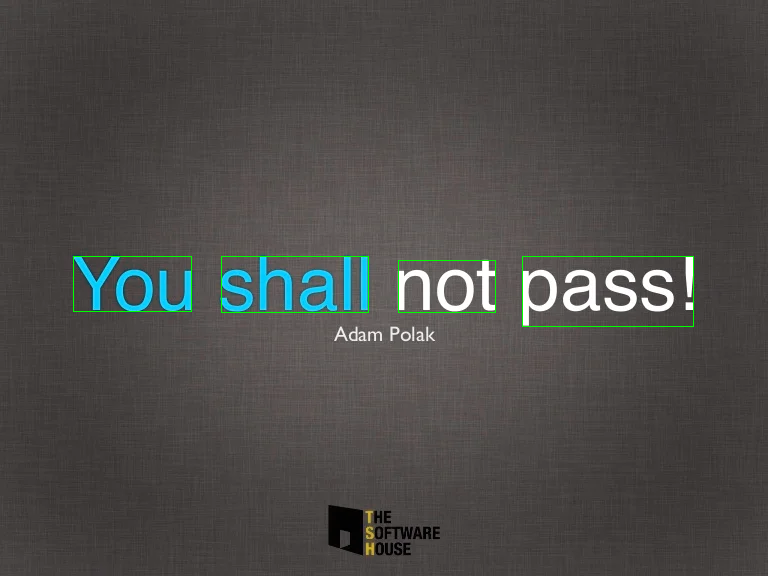

In [51]:
# Apresenta as coordenadas de forma coerente e ja determindas para que possam se alocar em torno de cada palavra do texto principal apresentado na imagem.
cv.rectangle (image_path_in_colab, pt1=(73,256), pt2=( (73+118),(256+55) ), color=(0,255,0), thickness=1)
cv.rectangle (image_path_in_colab, pt1=(221,256), pt2=( (221+147),(256+56) ), color=(0,255,0), thickness=1)
cv.rectangle (image_path_in_colab, pt1=(398,260), pt2=( (398+97),(260+52) ), color=(0,255,0), thickness=1)
cv.rectangle (image_path_in_colab, pt1=(522,256), pt2=( (522+171),(256+70) ), color=(0,255,0), thickness=1)
cv2_imshow(image_path_in_colab)



Exercícios: 

1. Descreva como você poderia carregar o modelo treinado para linguagem "português", e com isso melhorar a porcentagem de acerto do reconhecimento.

2. Imprima cada uma das caixas delimitadoras encontraras, na imagem lida usando OpenCV. Utilize a função cv::Rectangle para isso.
 